In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
def phi(u0, n):
    """
    # n: Nombre de numéros sur la roulette (sans compter le 0: nomnbre total avec le 0 est n+1)
    """
    M = 100  # Nombre de trajectoires
    N = 2000 # Durée totale (en s)
    T = np.arange(N)  # Indices des temps
    c = 1  # Débit d'argent rentrant (en €/tour)
    lam = 1 / (n + 1)
    dS = np.hstack((np.zeros((M, 1)), n * (np.random.random((M, N - 1)) < lam)))
    S = np.cumsum(dS, axis=1)
    u = u0 + c * T - S
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    phi = np.mean(u_alive, axis=0)
    return phi[-1]

In [4]:
vphi = np.vectorize(phi)


def phi_inf(u0, n):
    return np.mean(vphi(u0, n * np.ones(100)))

v_inf = np.vectorize(phi_inf)

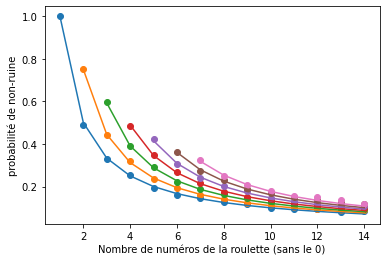

In [5]:
for k in range(1, 8):
    n_abscisse = np.arange(k, 15)

    r_ord = v_inf(k, n_abscisse)

    plt.scatter(n_abscisse, r_ord)

    plt.plot(n_abscisse, (n_abscisse + 1)**(k-1) / n_abscisse**k)

plt.xlabel("Nombre de numéros de la roulette (sans le 0)")
plt.ylabel("probabilité de non-ruine")
plt.show()

$\forall k > 0, \forall n \geq k, q_{n}^{k} = \frac{(n + 1)^{k - 1}}{n^{k}}$

In [6]:
q = lambda k, n: (n + 1) ** (k - 1) / n ** k

Pourquoi la formule ne fonctionne-t-elle pas pour $n < k$

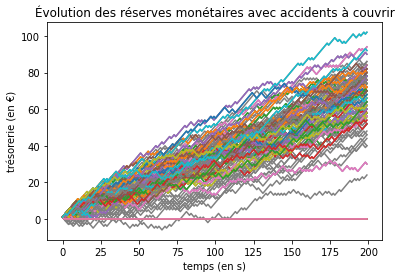

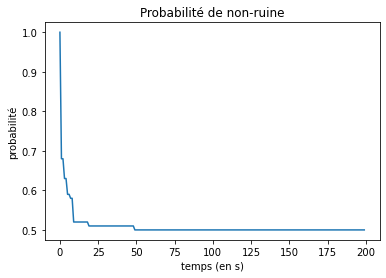

<ipython-input-7-5d5609f60842>:30: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(phi - phi[-1]))


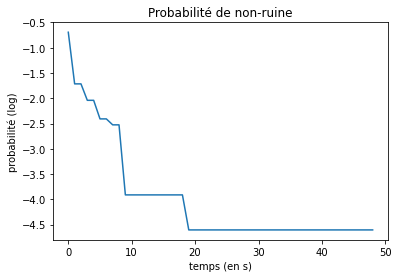

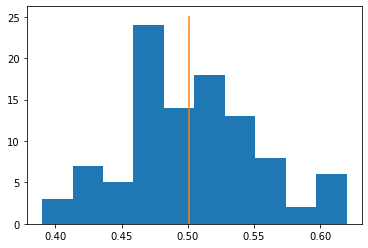

In [7]:
u0 = 1
n = 2  # Nombre de numéros sur la roulette (sans compter le 0: nomnbre total avec le 0 est n+1)
M = 100  # Nombre de trajectoires
N = 200 # Durée totale (en s)
T = np.arange(N)  # Indices des temps
c = 1  # Débit d'argent rentrant (en €/tour)
lam = 1 / (n + 1)
dS = np.hstack((np.zeros((M, 1)), n * (np.random.random((M, N - 1)) < lam)))
S = np.cumsum(dS, axis=1)
u = u0 + c * T - S
u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
u_cutted = u*(u_alive)
phi = np.mean(u_alive, axis=0)
expt = vphi(u0, n * np.ones(100))
phi_inf = np.mean(expt)
plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("temps (en s)")
plt.ylabel("trésorerie (en €)")
plt.plot(u.T, c='gray')
plt.plot(u_cutted.T)
plt.show()
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité")
plt.plot(phi)
plt.show()
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité (log)")
plt.plot(np.log(phi - phi[-1]))
plt.show()
plt.hist(expt)
plt.plot([phi_inf, phi_inf], [0, 25])
plt.show()